## Week 2 ##

This week, we want you to get acquainted with numerical intgration, using **Scipy**, and **lambda functions**, and with generating figures using **matplotlib**

To this end, we will make use of the Gamma function and the Stirling approximation, implementing them and closely inspecting the validity of the approximations done in the Exercise sheet.

Please continue making use of modules we previously used, such as **math** and **numpy**

Gamma Function:
- $\Gamma(N) =  \int_{0}^{\infty} t^{N-1}e^{-t} \,dt \  $

Stirling Approximation:
- $ N! \sim  \sqrt{2\pi N} (\frac{N}{e})^{N}   $

### Task 1: ###
This week's first task is to implement two functions.

1. Implement the Gamma function from the formula shown above as the first function.
    Hint: State the function as a lambda function, and make use of scipy's quad routine to perform the intrgation

2. Afterwards, implement a second function to calculate the Stirling approximation.

In [57]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [58]:
def gamma(n):
    val, err = scipy.integrate.quad(lambda t: t ** (n - 1) * np.exp(-t), 0, np.inf)
    return val, err


vgamma = np.vectorize(gamma)

#  same as scipy.special.gamma(n)

In [59]:
def stirling(n):
    val = np.sqrt(2 * np.pi * n) * (n / np.e) ** n
    return val


vstirling = np.vectorize(stirling)

### Task 2 : ###

This week's task 2 is to get familiar with the **matplotlib** package and to generate two plots.

- If you weren't able to implement the Gamma function from scratch, follow the **Notes** in this task!

**Important: label the axis and your data correctly any time you generate figures!**

1. First, generate a figure,to compare the  $\Gamma(N)$ function you implemented against Scipy's version, for $ 0 < N < 100$
   - **Note**: If you were not able to implement the Gamma function yourself, simply plot the Scipy version of the function.
   - Use a log scale on the y-axis.

&nbsp;

2. After, generate **one** plot, where you show the relative error of:
   - **Note**: If you were not able to implement the Gamma function yourself, use the Scipy version of the function to calculate the errors.
   - The Gamma function $\Gamma(N+1)$ compared to the explicit value of $N!$
   - The Stirling approximation for $N$ compared to the explicit value of $N!$
   - Plot both of these for $0< N < 60$.

/var/folders/0n/qlsqbkfj2dl5v4_hj0l1288h0000gn/T/ipykernel_62246/2062847279.py:2: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  val, err = scipy.integrate.quad(lambda t: t ** (n - 1) * np.exp(-t), 0, np.inf)


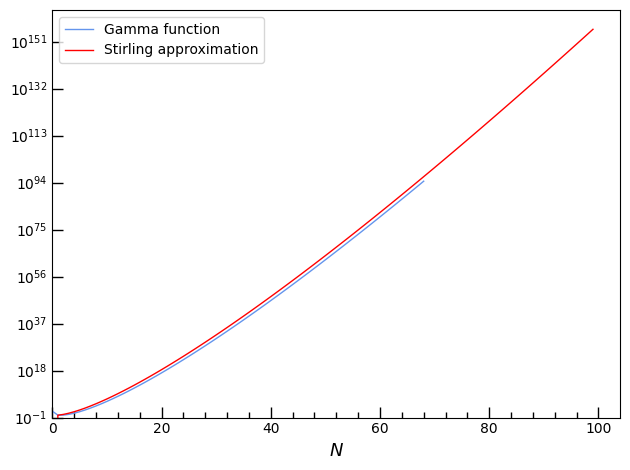

In [60]:
N_stirling = np.arange(0, 100, 1)
N_gamma = np.arange(0, 69, 1)

fig1, ax = plt.subplots()
ax.set_yscale('log')
plt.plot(N_gamma, vgamma(N_gamma)[0], label='Gamma function', color='cornflowerblue', lw='1')
plt.plot(N_stirling, vstirling(N_stirling), label='Stirling approximation', color='red', lw='1')
plt.xlim(0)
plt.ylim(1e-1)
plt.xlabel(xlabel="$N$", fontsize=13)

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(4))
ax.tick_params(direction='in', which='both', width=1)
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4)

plt.legend()
plt.tight_layout()

In [61]:
N = np.arange(0, 60, 1)
y = factorial(N)

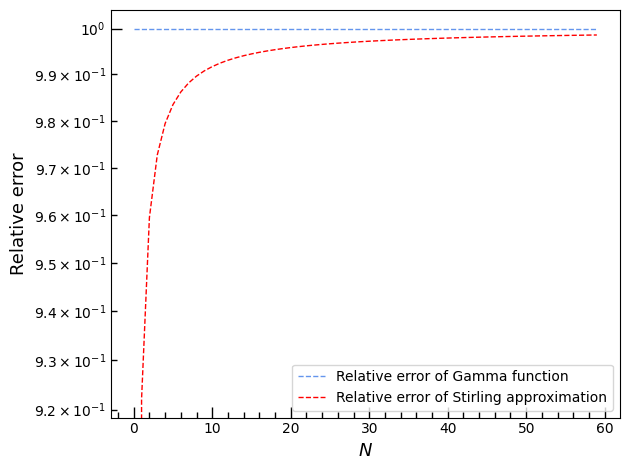

In [62]:
fig2, ax = plt.subplots()
ax.set_yscale('log')
plt.plot(N, abs(vgamma(N + 1)[0] / y), '--', label='Relative error of Gamma function', color='cornflowerblue', lw='1')
plt.plot(N, abs(vstirling(N) / y), '--', label='Relative error of Stirling approximation', color='red', lw='1')

plt.xlabel(xlabel="$N$", fontsize=13)
plt.ylabel(ylabel="Relative error", fontsize=13)

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.tick_params(direction='in', which='both', width=1)
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4)

plt.legend()
plt.tight_layout()

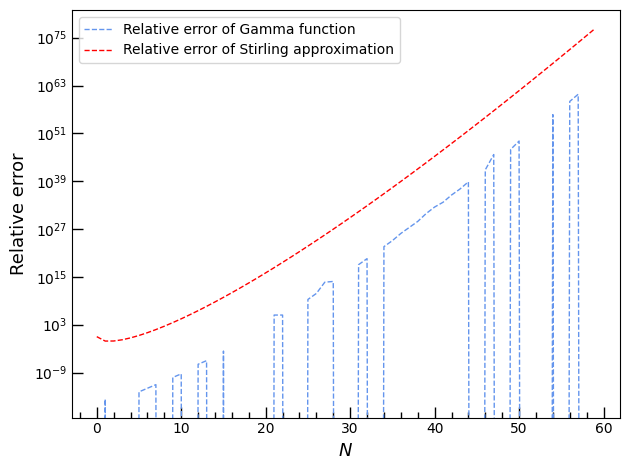

In [63]:
fig3, ax = plt.subplots()
ax.set_yscale('log')
plt.plot(N, abs(vgamma(N + 1)[0] - y), '--', label='Relative error of Gamma function', color='cornflowerblue', lw='1')
plt.plot(N, abs(vstirling(N) - y), '--', label='Relative error of Stirling approximation', color='red', lw='1')

plt.xlabel(xlabel="$N$", fontsize=13)
plt.ylabel(ylabel="Relative error", fontsize=13)

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(2))
ax.tick_params(direction='in', which='both', width=1)
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4)

plt.legend()
plt.tight_layout()

In [64]:
print((vgamma(52 + 1)[0] - y[52]))
print('%.10f' % gamma(52)[0], '%.10f' % y[52])

0.0
1551118753287382376542964161041390895395004879537273133859168321536.0000000000 80658175170943876845634591553351679477960544579306048386139594686464.0000000000
